<a href="https://colab.research.google.com/github/GangaMegha/Digital-Image-Processsing/blob/main/ECE637IntroductionToColorimetry.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load files

The lab pdf and input files are availble at https://cabouman.github.io/grad_labs/Colorimetry/index.html

In [ ]:
!unzip CIE_data.zip
!unzip color_img.zip
!unzip reflect.zip

Archive:  CIE_data.zip
  inflating: data.npy                
Archive:  color_img.zip
  inflating: img.tif                 
Archive:  reflect.zip
  inflating: reflect.npy             


# 1 Introduction

#### 1.3 The XYZ Color Space and Chromaticity
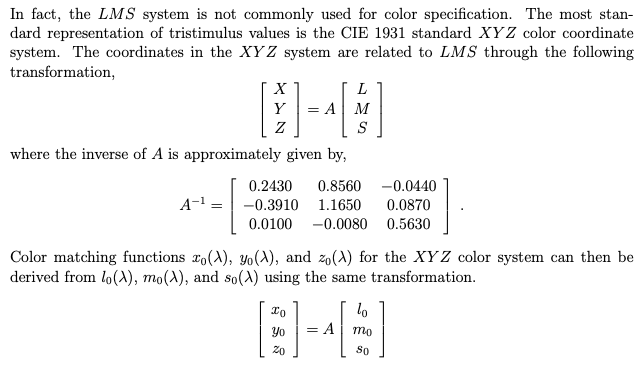

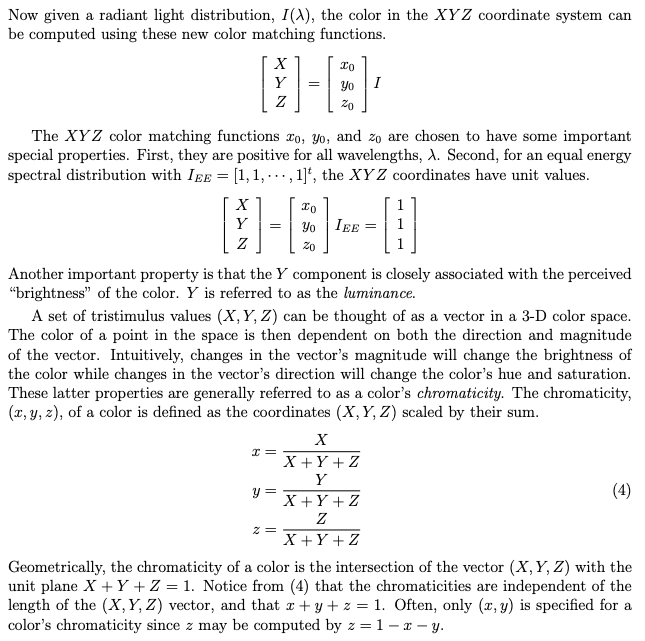

# 2 Plotting Color Matching Functions and Illuminants

In this section, you will plot the color matching functions and illuminants used in the laboratory. The relevant data is contained in the file data.npy, which is available at the lab website. It contains the XY Z color matching functions at the discrete set of wavelengths [400:10:700] nanometers. It also includes two vectors illum1 and illum2 containing radiant light energy from two illuminant sources. The illum1 vector is a D65 source (noon daylight), and illum2 is from a fluorescent light.

#### 1. Load the file data.npy into Python.

In [ ]:
import numpy as np

data = np.load('data.npy',allow_pickle=True)[()]
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'illum1', 'illum2', 'x', 'y', 'z'])

#### 2. Plot the three x0(λ), y0(λ), and z0(λ) color matching functions versus wavelength, λ.
Plot all three on the same axes, and use the [matplotlib.pyplot.legend] function to identify the graphs.

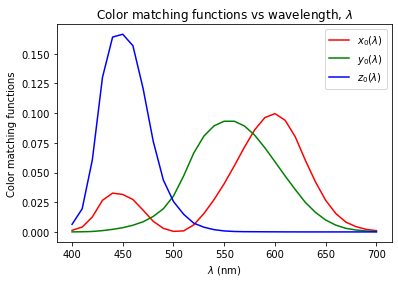

In [ ]:
import matplotlib.pyplot as plt

def plot_data(x, y, z):
  lbda = np.arange(400, 710, 10)
  plt.clf()
  plt.plot(lbda, x, color='r', label=r'$x_0$($\lambda$)')
  plt.plot(lbda, y, color='g', label=r'$y_0$($\lambda$)')
  plt.plot(lbda, z, color='b', label=r'$z_0$($\lambda$)')
  plt.xlabel(r'$\lambda$ (nm)')
  plt.ylabel(r'Color matching functions')
  plt.title(r'Color matching functions vs wavelength, $\lambda$')
  plt.legend()
  plt.savefig("./plots/color_matching_functions_vs_wavelength.png")

plot_data(data['x'][0], data['y'][0], data['z'][0])

#### 3. Compute the three l0(λ), m0(λ), and s0(λ) color matching functions corresponding to the long medium and short cones. 
You will need to use the transformation given in Section 1.3. Plot these three functions versus wavelength, λ.

In [ ]:
def plot_data_lms(LMS):
  lbda = np.arange(400, 710, 10)
  plt.clf()
  plt.plot(lbda, LMS[0], color='r', label=r'$l_0$($\lambda$)')
  plt.plot(lbda, LMS[1], color='g', label=r'$m_0$($\lambda$)')
  plt.plot(lbda, LMS[2], color='b', label=r'$s_0$($\lambda$)')
  plt.xlabel(r'$\lambda$ (nm)')
  plt.ylabel(r'Color matching functions (l,m,s)')
  plt.title(r'Color matching functions (l,m,s) vs wavelength, $\lambda$')
  plt.legend()
  plt.savefig("./plots/color_matching_functions_lms_vs_wavelength.png")

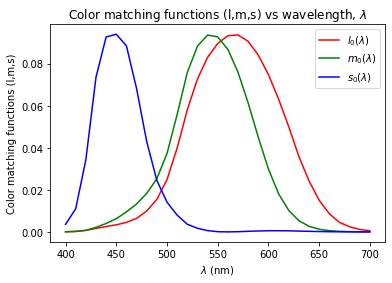

In [ ]:
A_inv = np.array([[0.2430, 0.8560, -0.0440], 
              [-0.3910, 1.1650, 0.0870], 
              [0.0100, -0.0080, 0.5630]])

XYZ = np.array([data['x'][0], data['y'][0], data['z'][0]])

# From section 1.3
LMS = A_inv @ XYZ

plot_data_lms(LMS)

#### 4. Plot the spectrum of the D65 and fluorescent illuminants versus wavelength, λ.

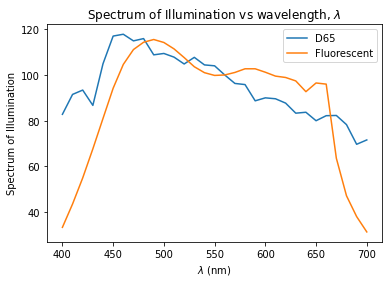

In [ ]:
def plot_illuminants(D65, Fluorescent):
  lbda = np.arange(400, 710, 10)
  plt.clf()
  plt.plot(lbda, D65, label='D65')
  plt.plot(lbda, Fluorescent, label="Fluorescent")
  plt.xlabel(r'$\lambda$ (nm)')
  plt.ylabel('Spectrum of Illumination')
  plt.title(r'Spectrum of Illumination vs wavelength, $\lambda$')
  plt.legend()
  plt.savefig("./plots/spectrum_illumination_vs_wavelength.png")

plot_illuminants(data["illum1"][0], data["illum2"][0])

# 3 Chromaticity Diagrams
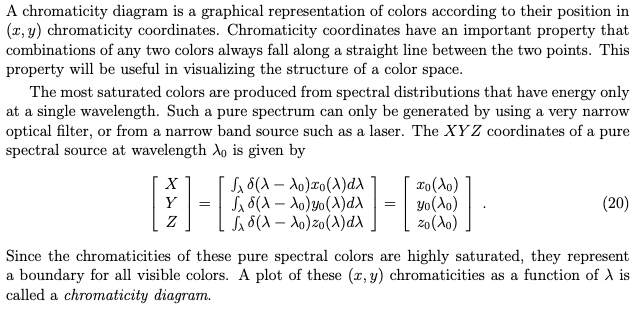

##### 3.1. Load the data file data.npy into the Python.

#### 3.2. Using equations (20) and (4), plot the chromaticities (x, y) of a pure spectral source as a parametric function of λ. 
Use a solid line type.

#### 3.3. In your diagram, also plot the three CIE 1931 standard RGB primaries using the chromaticities given in equation (18). 
Connect the three points with straight lines to illustrate the range of colors that can be generated by these three primaries. Label each of the three points using the [matplotlib.pyplot.text].

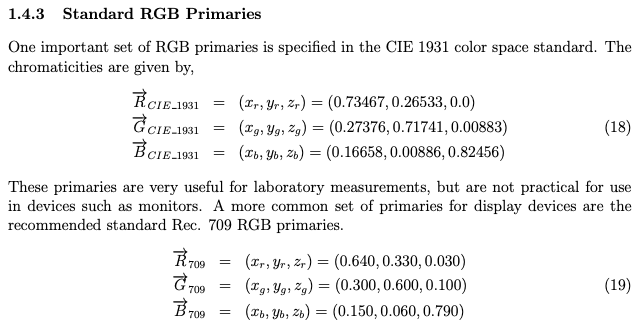

#### 3.4. Repeat the previous step for the Rec. 709 RGB primaries given in equation (19).

#### 3.5. Plot and label a point on your diagram for the chromaticity of a D65 white point, given in equation (9).

(x_wp, y_wp, z_wp)_D65 = (0.3127, 0.3290, 0.3583) ------ (9)

#### 3.6. Repeat the previous step for an equal energy white point, given in equation (10).

(x_wp, y_wp, z_wp)_EE = (0.3333, 0.3333, 0.3333) ------ (10)

#### 3.7. Print or export your final diagram.

In [ ]:
# Section 3.1 : Already loaded into data

In [ ]:
# Section 3.2
xyz = XYZ / np.sum (XYZ, axis=0)

<Figure size 432x288 with 0 Axes>

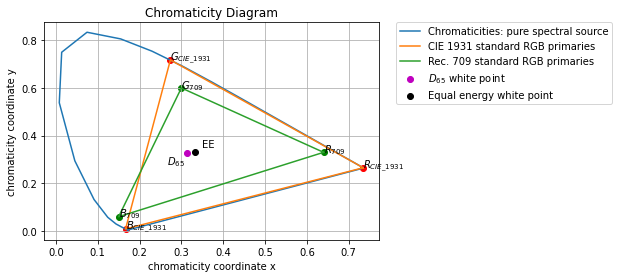

In [ ]:
# Create plot
x = list(xyz[0])
y = list(xyz[1])

x.append(xyz[0,0])
y.append(xyz[1,0])

plt.clf()
fig, ax = plt.subplots()
ax.plot(x, y, label='Chromaticities: pure spectral source')
ax.set_xlabel("chromaticity coordinate x")
ax.set_ylabel("chromaticity coordinate y")
ax.set_title('Chromaticity Diagram')


# Section 3.3
CIE1931 = np.array([[0.73467, 0.26533, 0.0], [0.27376, 0.71741, 0.00883], [0.16658, 0.00886, 0.82456]])
text = [r'$R_{CIE\_1931}$', r'$G_{CIE\_1931}$', r'$B_{CIE\_1931}$']
ax.scatter(CIE1931[:,0], CIE1931[:,1], c='r', marker='o')
for i, txt in enumerate(text):
    ax.annotate(txt, (CIE1931[i, 0], CIE1931[i, 1]))

x = list(CIE1931[:,0])
y = list(CIE1931[:,1])

x.append(CIE1931[0,0])
y.append(CIE1931[0,1])
ax.plot(x, y, label='CIE 1931 standard RGB primaries')

ax.grid()
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

# Section 3.4
RGB709 = np.array([[0.640, 0.330, 0.030], [0.300, 0.600, 0.100], [0.150, 0.060, 0.790]])
text = [r'$R_{709}$', r'$G_{709}$', r'$B_{709}$']
ax.scatter(RGB709[:,0], RGB709[:,1], c='g', marker='o')
for i, txt in enumerate(text):
    ax.annotate(txt, (RGB709[i, 0], RGB709[i, 1]))

x = list(RGB709[:,0])
y = list(RGB709[:,1])

x.append(RGB709[0,0])
y.append(RGB709[0,1])
ax.plot(x, y, label='Rec. 709 standard RGB primaries')

# Section 3.5
D65_wp = [0.3127, 0.3290, 0.3583]
ax.scatter(D65_wp[0]/sum(D65_wp), D65_wp[1]/sum(D65_wp), c='m', marker='o', label=r"$D_{65}$ white point")
ax.annotate(r"$D_{65}$", (D65_wp[0]/sum(D65_wp), D65_wp[1]/sum(D65_wp)), xytext=(D65_wp[0]/sum(D65_wp)*0.85, D65_wp[1]/sum(D65_wp)*0.85))

# Section 3.6
EE_wp = [0.3333, 0.3333, 0.3333]
ax.scatter(EE_wp[0]/sum(EE_wp), EE_wp[1]/sum(EE_wp), c='k', marker='o', label="Equal energy white point")
ax.annotate(r"EE", (EE_wp[0]/sum(EE_wp), EE_wp[1]/sum(EE_wp)), xytext=(EE_wp[0]/sum(EE_wp)*1.05, EE_wp[1]/sum(EE_wp)*1.05))


ax.grid(True)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

# Section 3.7
plt.savefig("./plots/chromaticity_diagram.png")


# 4 Rendering an Image from Illuminant, Reflectance, and Color Matching Functions

The objective of this section will be to display a calibrated color image from a known illuminant spectrum and the reflectance coefficients at each point in the image. You will use the XYZ color matching functions and illuminant data from the previous section, as well as an
m × n × 31 array, R, that contains reflectance coefficients at 31 wavelengths for each point in an m × n image. The indexing of this array has the order R(row,column,wavelength). The reflectance data can be found in the file reflect.mat, which is available from the lab web site.
Note this file is approximately 11 Mbytes.

1. Load data.npy and reflect.npy into your Python workspace.
2. Using the D65 light source (illum1) and R, compute the reflected light energy at each given wavelength, λ, using equation (1). Do this for each pixel in the image, producing an m × n × 31 array, called I.
       It is important to note that the color that one sees is a function of both the reflectance of an object’s surface, 
       and the spectral distribution of the light source, or illuminant. More specifically, let S(λ) be the spectral energy 
       density of an illuminant as a function of the spectral wavelength λ, and let R(λ) be the fraction of the illuminant 
       energy that is reflected toward the viewer. The spectral distribution of light that the viewer sees is given by
                  I(λ) = R(λ)S(λ) -------- (1)
3. Compute the XYZ tristimulus values for each pixel by applying the color matching functions to the spectral energy in I. Call this m × n × 3 array XYZ.
        XYZ = xyz(λ).I(λ)
4. Assuming your computer monitor uses the Rec. 709 RGB primaries, and has a D65 white point, compute the transformation matrix M709 D65 that will transform from
XYZ to this RGB color space. Print out this matrix.
          M_709_D65 : [[0.4123908  0.35758434 0.18048079]
                       [0.21263901 0.71516868 0.07219232]
                       [0.01933082 0.11919478 0.95053215]]
5. Use M709 D65 to transform each pixel in your XYZ array into RGB coordinates.
6. Some RGB component values may fall outside the range [0,1], which are colors your monitor will be unable to display. To fix this, appropriately clip any components
outside this range to 0 or 1.
7. Now γ-correct your image so that it will be displayed properly on your monitor. Assume
here that your monitor has a γ of 2.2.
8. Display the result using the Image from pillow, and print or export the result for you
report. In this case you will first need to scale the pixel values by 255, and convert the
array to type uint8.
9. Repeat the entire exercise using the fluorescent source in illum2. Note that the only
change here will be the light source–you should use the same M709 D65 transformation
as before for the XY Z to RGB conversion.
10. Compare the two results.


**As seen below, the image obtained from illum2 appears more brighter than illum1. Also, image using illum1 seems to be more blue as compared to illum2.**

illum1:

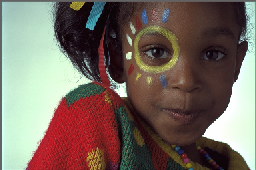

illum2 :

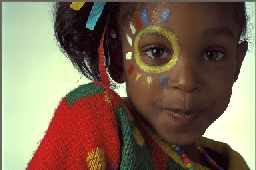

In [ ]:
import numpy as np

# Section 4.1
data = np.load('data.npy',allow_pickle=True)[()]
reflect = np.load('reflect.npy',allow_pickle=True)[()]
data.keys(), reflect.keys(), reflect['R'].shape

(dict_keys(['__header__', '__version__', '__globals__', 'illum1', 'illum2', 'x', 'y', 'z']),
 dict_keys(['__header__', '__version__', '__globals__', 'R']),
 (170, 256, 31))

In [ ]:
# Section 4.2 : I(λ) = R(λ)S(λ)
print(data["illum1"].shape, reflect['R'].shape)
I = reflect['R'] * data["illum1"][0]
I.shape

(1, 31) (170, 256, 31)


(170, 256, 31)

In [ ]:
# Section 4.3
xyz = np.array([data['x'][0], data['y'][0], data['z'][0]])
print(xyz.shape)

# Tristimulus values
XYZ = I @ xyz.T
XYZ.shape

(3, 31)


(170, 256, 3)

In [ ]:
# Section 4.4

# Find the set of scaling constants kr, kg, and kb which will determine 
# the true primary colors, given the white point specification
RGB709 = np.array([[0.640, 0.330, 0.030], [0.300, 0.600, 0.100], [0.150, 0.060, 0.790]]).T
D65_wp = np.array([0.3127, 0.3290, 0.3583])
print("RGB709 : \n", RGB709)
print("\n\nD65_wp : ", D65_wp)

krgb = np.linalg.inv(RGB709) @ (D65_wp/D65_wp[1])
print("\nkrgb : ", krgb)

# # Compute M_709_D65
M_709_D65 = RGB709 @ np.diag(krgb)
print("\n\nM_709_D65 : \n", M_709_D65)

RGB709 : 
 [[0.64 0.3  0.15]
 [0.33 0.6  0.06]
 [0.03 0.1  0.79]]


D65_wp :  [0.3127 0.329  0.3583]

krgb :  [0.64436062 1.1919478  1.20320526]


M_709_D65 : 
 [[0.4123908  0.35758434 0.18048079]
 [0.21263901 0.71516868 0.07219232]
 [0.01933082 0.11919478 0.95053215]]


In [ ]:
# Section 4.5
# Use M709 D65 to transform each pixel in your XYZ array into RGB coordinates
rgb = XYZ @ np.linalg.inv(M_709_D65).T
rgb.shape

(170, 256, 3)

In [ ]:
# Section 4.6
# Clip any components outside this range to 0 or 1
print(np.max(rgb), np.min(rgb))
rgb[rgb>1] = 1
rgb[rgb<0] = 0
print(np.max(rgb), np.min(rgb))

1.0000000000000022 1.1553467942980436e-14
1.0 1.1553467942980436e-14


In [ ]:
# Section 4.7
# γ-correct your image so that it will be displayed properly on your monitor. 
# Assume here that your monitor has a γ of 2.2.
rgb_gamma_corrected = rgb ** (1/2.2) 
print(np.max(rgb_gamma_corrected), np.min(rgb_gamma_corrected), rgb_gamma_corrected.shape)

1.0 4.6224184314277794e-07 (170, 256, 3)


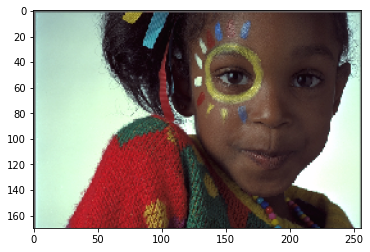

In [ ]:
# Section 4.8
from PIL import Image
im = Image.open('img.tif')
x = np.array(im)

# Some calculation
im = Image.fromarray(np.uint8(255*rgb_gamma_corrected))
im.save("./plots/img_illum1.png")
plt.imshow(im)

(1, 31) (170, 256, 31)
(3, 31)
1.130254250093266 -0.0010589533693506053
1.0 0.0
1.0 0.0 (170, 256, 3)


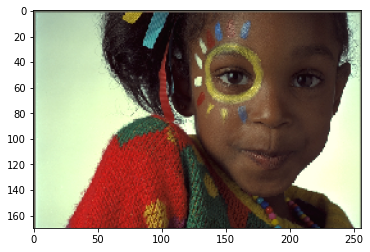

In [ ]:
# Section 4.9 : Use illum2
print(data["illum2"].shape, reflect['R'].shape)
I = reflect['R'] * data["illum2"][0]
I.shape

xyz = np.array([data['x'][0], data['y'][0], data['z'][0]])
print(xyz.shape)

# Tristimulus values
XYZ = I @ xyz.T
XYZ.shape

# Use M709 D65 to transform each pixel in your XYZ array into RGB coordinates
rgb = XYZ @ np.linalg.inv(M_709_D65).T
rgb.shape

# Clip any components outside this range to 0 or 1
print(np.max(rgb), np.min(rgb))
rgb[rgb>1] = 1
rgb[rgb<0] = 0
print(np.max(rgb), np.min(rgb))

# γ-correct your image so that it will be displayed properly on your monitor. 
# Assume here that your monitor has a γ of 2.2.
rgb_gamma_corrected = rgb ** (1/2.2) 
print(np.max(rgb_gamma_corrected), np.min(rgb_gamma_corrected), rgb_gamma_corrected.shape)

im = Image.open('img.tif')
x = np.array(im)

# Some calculation
im = Image.fromarray(np.uint8(255*rgb_gamma_corrected))
im.save("./plots/img_illum2.png")
plt.imshow(im)

# 5.  Color Chromaticity Diagram

In this exercise you will create a chromaticity diagram similar to Section 3, but that will also display a range of colors available from your monitor. Recall the chromaticity (x, y, z) of a color (X, Y, Z) is the intersection of the color vector with the plane X + Y + Z = 1. Here, you will display the colors for all the points within the plane X + Y + Z = 1 that your monitor is capable of reproducing.

#### 5.1. Use meshgrid to create two coordinate matrices, x and y, of chromaticity values ranging from 0 to 1, with a spacing of 0.005. Then compute the corresponding z matrix. For each location (i, j), these matrices give a particular set of chromaticity coordinates (xij , yij , zij ), where x increases with j (column), and y increases with i (row).

In [ ]:
x_ = np.arange(0, 1.005, 0.005)
y_ = np.arange(1, -0.005, -0.005)

x, y = np.meshgrid(x_, y_)
z = 1 - x - y
x.shape, y.shape, z.shape

((201, 201), (201, 201), (201, 201))

#### 5.2. For each location (i, j) in the chromaticity matrices, compute the corresponding display (r, g, b) values for the color (X, Y, Z) = (xij , yij , zij ). Here, assume your monitor produces the Rec. 709 RGB primaries, and the primaries fall right on the plane X + Y + Z = 1. In other words, the transformation matrix, M709, is given exactly by equations (19) and (15), with kr = kg = kb = 1. Place the three computed RGB values in a 3-D color image array

In [ ]:
RGB709 = np.array([[0.640, 0.330, 0.030], [0.300, 0.600, 0.100], [0.150, 0.060, 0.790]]).T
krgb = np.array([1, 1, 1])

# Compute M_709_D65
M_709_D65 = RGB709 @ np.diag(krgb)
print("\n\nM_709_D65 : \n", M_709_D65)
print("\nM_709_D65 : ", M_709_D65.shape)

# Create XYZ matrix
XYZ = np.transpose(np.array([x, y, z]), (1, 2, 0))
print("\nXYZ : ", XYZ.shape)

# 3-D color image array
rgb = XYZ @ np.linalg.inv(M_709_D65).T
print("\nrgb : ", rgb.shape)



M_709_D65 : 
 [[0.64 0.3  0.15]
 [0.33 0.6  0.06]
 [0.03 0.1  0.79]]

M_709_D65 :  (3, 3)

XYZ :  (201, 201, 3)

rgb :  (201, 201, 3)


#### 5.3. The locations where r, g, or b are negative represent colors that cannot be reproduced by this set of primaries. In each location where the r, g, or b component is negative, set all three components to 1 (white).

In [ ]:
print(np.max(rgb), np.min(rgb))
for i in range(rgb.shape[0]):
  for j in range(rgb.shape[1]):
    for k in range(rgb.shape[2]):
      if rgb[i,j,k]<0:
        rgb[i,j,:] = [1,1,1]
print(np.max(rgb), np.min(rgb))

2.2360553324408743 -1.4502454261490403
1.0 3.0535591904198335e-16


#### 5.4. Gamma-correct each color plane, assuming a γ value of 2.2.

In [ ]:
rgb_gamma_corrected = rgb ** (1/2.2) 

print(np.max(rgb_gamma_corrected), np.min(rgb_gamma_corrected), rgb_gamma_corrected.shape)

1.0 8.864193884889549e-08 (201, 201, 3)


#### 5.5. Use the Python command matplotlib.pyplot.imshow to display your color diagram.
Label and scale the x and y axes appropriately. Hint: The scaling can be achieved
easily with a command similar to imshow(img,extent=[0,1,0,1]).

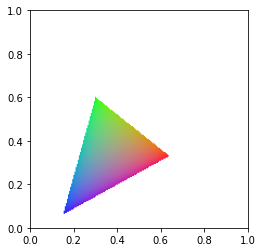

In [ ]:
plt.imshow(rgb_gamma_corrected, extent=[0,1,0,1])

#### 5.6. Insert the same chromaticity plot of a pure spectral source that you produced in Section 3. Note that you must have the correct scaling of the x and y axes in the previous step for this plot to align properly

<Figure size 432x288 with 0 Axes>

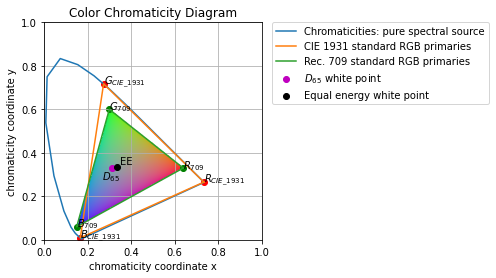

In [ ]:
XYZ = np.array([data['x'][0], data['y'][0], data['z'][0]])
xyz = XYZ / np.sum (XYZ, axis=0)

# Create plot
x = list(xyz[0])
y = list(xyz[1])

x.append(xyz[0,0])
y.append(xyz[1,0])

plt.clf()
fig, ax = plt.subplots()
ax.plot(x, y, label='Chromaticities: pure spectral source')
ax.set_xlabel("chromaticity coordinate x")
ax.set_ylabel("chromaticity coordinate y")
ax.set_title('Color Chromaticity Diagram')


# Section 3.3
CIE1931 = np.array([[0.73467, 0.26533, 0.0], [0.27376, 0.71741, 0.00883], [0.16658, 0.00886, 0.82456]])
text = [r'$R_{CIE\_1931}$', r'$G_{CIE\_1931}$', r'$B_{CIE\_1931}$']
ax.scatter(CIE1931[:,0], CIE1931[:,1], c='r', marker='o')
for i, txt in enumerate(text):
    ax.annotate(txt, (CIE1931[i, 0], CIE1931[i, 1]))

x = list(CIE1931[:,0])
y = list(CIE1931[:,1])

x.append(CIE1931[0,0])
y.append(CIE1931[0,1])
ax.plot(x, y, label='CIE 1931 standard RGB primaries')

ax.grid()
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

# Section 3.4
RGB709 = np.array([[0.640, 0.330, 0.030], [0.300, 0.600, 0.100], [0.150, 0.060, 0.790]])
text = [r'$R_{709}$', r'$G_{709}$', r'$B_{709}$']
ax.scatter(RGB709[:,0], RGB709[:,1], c='g', marker='o')
for i, txt in enumerate(text):
    ax.annotate(txt, (RGB709[i, 0], RGB709[i, 1]))

x = list(RGB709[:,0])
y = list(RGB709[:,1])

x.append(RGB709[0,0])
y.append(RGB709[0,1])
ax.plot(x, y, label='Rec. 709 standard RGB primaries')

# Section 3.5
D65_wp = [0.3127, 0.3290, 0.3583]
ax.scatter(D65_wp[0]/sum(D65_wp), D65_wp[1]/sum(D65_wp), c='m', marker='o', label=r"$D_{65}$ white point")
ax.annotate(r"$D_{65}$", (D65_wp[0]/sum(D65_wp), D65_wp[1]/sum(D65_wp)), xytext=(D65_wp[0]/sum(D65_wp)*0.85, D65_wp[1]/sum(D65_wp)*0.85))

# Section 3.6
EE_wp = [0.3333, 0.3333, 0.3333]
ax.scatter(EE_wp[0]/sum(EE_wp), EE_wp[1]/sum(EE_wp), c='k', marker='o', label="Equal energy white point")
ax.annotate(r"EE", (EE_wp[0]/sum(EE_wp), EE_wp[1]/sum(EE_wp)), xytext=(EE_wp[0]/sum(EE_wp)*1.05, EE_wp[1]/sum(EE_wp)*1.05))

plt.imshow(rgb_gamma_corrected, extent=[0,1,0,1])

ax.grid(True)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

plt.savefig("./plots/color_chromaticity_diagram.png")